In [1]:
import math                                                 # basic calculations like square root
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import matplotlib.pyplot as plt                             # for plotting
import pandas as pd                                         # DataFrames
import numpy as np
import seaborn as sns
import pandas.plotting as pd_plot
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.ensemble import RandomForestRegressor          # random forest method
from sklearn.model_selection import train_test_split        # train and test split

In [2]:
df_train = pd.read_csv("HFNF_PSZ_area_RESULTS_1.csv", index_col=0)
df_test = pd.read_csv("HFNF_PSZ_area_RESULTS_1.csv", index_col=0)

df_total = [df_train, df_test]
df_total = pd.concat(df_total)
df_total.rename(columns={"beta": "Rel. Angle",'miu':'Friction Coefficient','K':'Stress Diff.',
                         'OverPress':'Overpressure Index'
                        }, inplace=True)

df_total.head(5)

,FG,Stress Diff.,Rel. Angle,TVD,Overpressure Index,Friction Coefficient,P_net,Area
0,0.015067,0.896003,12.001955,2953.342023,1.453342,0.453342,1.533420,9.5613
1,0.020004,0.970055,67.541523,3200.184547,1.700185,0.700185,4.001845,0.1170
2,0.019377,0.960661,60.495387,3168.868388,1.668868,0.668868,3.688684,0.3497
3,0.015052,0.895776,11.831928,2952.586345,1.452586,0.452586,1.525863,9.6579
4,0.016875,0.923127,32.344970,3043.755422,1.543755,0.543755,2.437554,3.2293


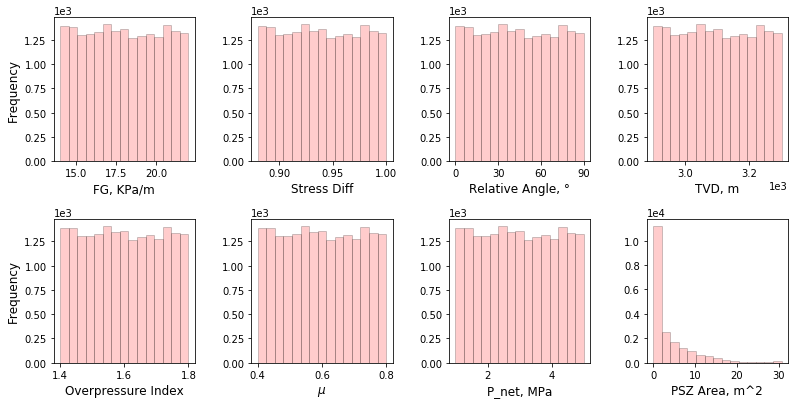

In [3]:
plt.subplot(241)
PARA = 'FG'
plt.hist(df_total[PARA]*1e3, alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel(PARA+', KPa/m',fontsize=12); plt.ylabel("Frequency",fontsize=12); 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplot(242)
PARA = 'Stress Diff.'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel('Stress Diff',fontsize=12); 
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.subplot(243)
PARA = 'Rel. Angle'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel('Relative Angle, \N{DEGREE SIGN}',fontsize=12); 
plt.xticks(np.arange(0, 91, step=30))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplot(244)
PARA = 'TVD'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel(PARA+', m',fontsize=12); 
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.subplot(245)
PARA = 'Overpressure Index'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel(PARA,fontsize=12); plt.ylabel("Frequency",fontsize=12); 
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.subplot(246)
PARA = 'Friction Coefficient'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel('$\\mu$',fontsize=12); 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplot(247)
PARA = 'P_net'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel('P_net, MPa',fontsize=12); 
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.subplot(248)
PARA = 'Area'
plt.hist(df_total[PARA], alpha = 0.2, color = 'red', edgecolor = 'black', bins=15)
plt.xlabel('PSZ Area, m^2',fontsize=12); 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=1.2, wspace=0.4, hspace=0.4)
plt.savefig("01_Statistics_DataSet.png", dpi=300,bbox_inches='tight')

In [4]:
# Search Max Trees
import warnings
warnings.filterwarnings('ignore')

seed = 77771
x_train,x_test,y_train,y_test = train_test_split(df_total[['FG','Stress Diff.','Rel. Angle','TVD',
                                                           'Overpressure Index','Friction Coefficient','P_net']],
                                                 df_total[['Area']],test_size=0.5, random_state=seed)
max_num_trees = 100                                  
num_trees = np.linspace(1,max_num_trees,max_num_trees)
max_features = int(round(np.sqrt(6)))
max_depth = 10    
fit_forests = []; oob_mse = []; oob_score = []; index = 1

for num_tree in num_trees:                                 # loop over number of trees in our random forest
    fit_forests.append(RandomForestRegressor(max_depth=max_depth,random_state=seed,n_estimators=int(num_tree),max_features = max_features,n_jobs=-1))
    fit_forests[index-1].fit(X = x_train, y = y_train)
    oob_mse.append( metrics.mean_squared_error(y_test,fit_forests[index-1].predict(x_test)) )
    oob_score.append( metrics.explained_variance_score(y_test,fit_forests[index-1].predict(x_test)) )
    index = index + 1

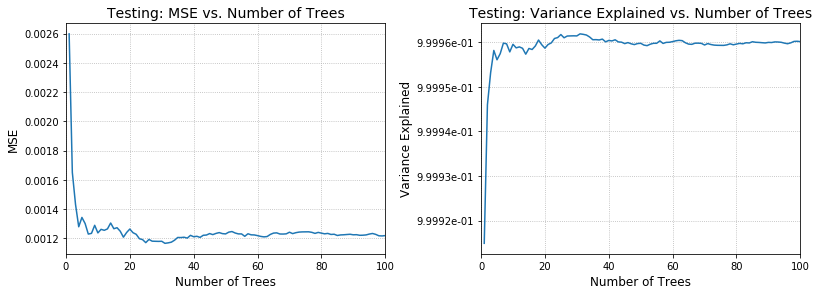

In [5]:
ax1=plt.subplot(121)
ax1.set_title('Testing: MSE vs. Number of Trees',fontsize=14); 
ax1.set_xlabel('Number of Trees',fontsize=12)
ax1.set_ylabel('MSE',fontsize=12)
ax1.plot(num_trees,oob_mse)
ax1.set_xlim(0,max_num_trees); ax1.set_xticks(np.arange(0, max_num_trees+1, 20.0)); ax1.grid(linestyle=':')

ax2=plt.subplot(122)
ax2.set_title('Testing: Variance Explained vs. Number of Trees',fontsize=14); 
ax2.set_xlabel('Number of Trees',fontsize=12)
ax2.set_ylabel('Variance Explained',fontsize=12)
ax2.plot(num_trees,oob_score)
ax2.set_xlim(0,max_num_trees); ax1.set_xticks(np.arange(0, max_num_trees+1, 20.0)); ax2.grid(linestyle=':')
import matplotlib.ticker as mtick
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=0.8, wspace=0.3, hspace=0)
plt.savefig("02_HyperTunning_Trees.png", dpi=300,bbox_inches='tight')

In [6]:
# with max trees found, find max depth
import warnings
warnings.filterwarnings('ignore')

max_dep = 40                                  
max_depths = np.linspace(1,max_dep,max_dep)  

num_trees = 40
fit_forests = []; oob_mse = []; oob_score = []; 

index = 1
for max_depth in max_depths:                                  
    fit_forests.append(RandomForestRegressor(max_depth=max_depth,random_state=seed,n_estimators=int(num_tree),max_features = max_features,n_jobs=-1))
    fit_forests[index-1].fit(X = x_train, y = y_train)
    oob_mse.append( metrics.mean_squared_error(y_test,fit_forests[index-1].predict(x_test)) )
    oob_score.append( metrics.explained_variance_score(y_test,fit_forests[index-1].predict(x_test)) )
    index = index + 1

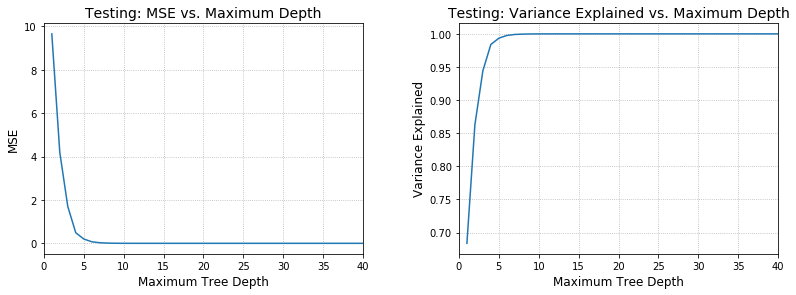

In [7]:
plt.subplot(121)
plt.title('Testing: MSE vs. Maximum Depth',fontsize=14); 
plt.xlabel('Maximum Tree Depth',fontsize=12)
plt.ylabel('MSE',fontsize=12)
plt.plot(max_depths,oob_mse)
plt.xlim(0,max_dep); plt.grid(linestyle=':')

plt.subplot(122)
plt.title('Testing: Variance Explained vs. Maximum Depth',fontsize=14); 
plt.xlabel('Maximum Tree Depth',fontsize=12)
plt.ylabel('Variance Explained',fontsize=12)
plt.plot(max_depths,oob_score)
plt.xlim(0,max_dep); plt.grid(linestyle=':')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=0.8, wspace=0.3, hspace=0)
plt.savefig("03_HyperTunning_Depth.png", dpi=300,bbox_inches='tight')

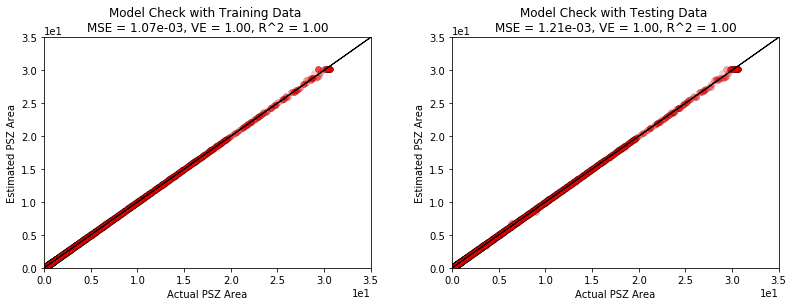

In [14]:
num_tree = 40
max_depth = 10

regressor = RandomForestRegressor(max_depth=max_depth, random_state=55667, n_estimators=num_tree,max_features = max_features,n_jobs=-1)
regressor.fit(X = x_train, y = y_train)      

plt.subplot(121)
y_pred = regressor.predict(x_train)
plt.scatter(y_train,y_pred,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black")
plt.xlabel('Actual PSZ Area'); plt.ylabel('Estimated PSZ Area')
plt.xlim(0,35); plt.ylim(0,35)
plt.arrow(0,0,6e5,6e5,width=0.02,color='black',head_length=0.0,head_width=0.0)
MSE = metrics.mean_squared_error(y_train,y_pred)
Var_Explained = metrics.explained_variance_score(y_train,y_pred)
cor = math.sqrt(metrics.r2_score(y_train,y_pred))
plt.title('Model Check with Training Data \nMSE = %.2e, VE = %.2f, R^2 = %.2f' %(round(MSE,10),round(Var_Explained,2), round(cor,2)),fontsize=12)
plt.ticklabel_format(style='sci', scilimits=(0,0))

plt.subplot(122)
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black")
plt.xlabel('Actual PSZ Area'); plt.ylabel('Estimated PSZ Area')
plt.xlim(0,35); plt.ylim(0,35)
plt.arrow(0,0,6e5,6e5,width=0.02,color='black',head_length=0.0,head_width=0.0)
MSE = metrics.mean_squared_error(y_test,y_pred)
Var_Explained = metrics.explained_variance_score(y_test,y_pred)
cor = math.sqrt(metrics.r2_score(y_test,y_pred))
plt.title('Model Check with Testing Data \nMSE = %.2e, VE = %.2f, R^2 = %.2f' %(round(MSE,10),round(Var_Explained,2), round(cor,2)),fontsize=12)
plt.ticklabel_format(style='sci', scilimits=(0,0))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=0.8, wspace=0.25, hspace=0)
plt.savefig("04_Final_Results.png", dpi=300,bbox_inches='tight')

In [9]:
num_tree = 40
max_depth = 10
regressor = RandomForestRegressor(max_depth=max_depth, n_estimators=num_tree,max_features = max_features,n_jobs=-1)
regressor.fit(X = x_train, y = y_train) 
feature_imp = pd.Series(regressor.feature_importances_,index=x_train.columns[0:7]).sort_values(ascending=False)

cases = 500
for i in range(cases-1):
    regressor = RandomForestRegressor(max_depth=max_depth, n_estimators=num_tree,max_features = max_features,n_jobs=-1)
    regressor.fit(X = x_train, y = y_train) 
    feature_imp += pd.Series(regressor.feature_importances_,index=x_train.columns[0:7])
    
feature_imp=feature_imp.sort_values(ascending=False)

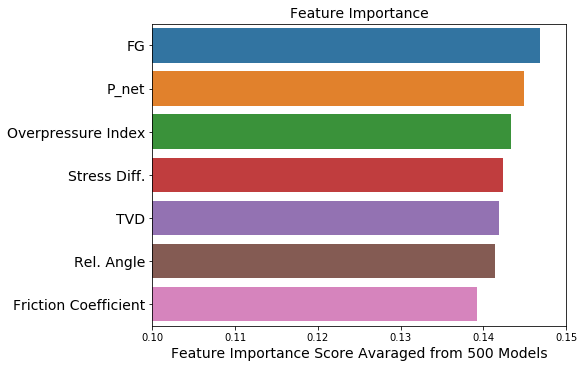

In [10]:
fig = plt.figure(figsize=(8, 5),facecolor='white',constrained_layout=True)
plt.subplot(111)
sns.barplot(x=feature_imp/cases, y=feature_imp.index)
plt.xlabel('Feature Importance Score Avaraged from %d Models'%(cases),fontsize=14)
plt.xlim(0.1,0.15)
plt.yticks(fontsize=14)
plt.title("Feature Importance",fontsize=14)
plt.savefig("05_FeatureImportance_Results.png", dpi=300,bbox_inches='tight')

In [11]:
feature_imp/cases

FG                      0.146829
P_net                   0.144898
Overpressure Index      0.143325
Stress Diff.            0.142395
TVD                     0.141915
Rel. Angle              0.141412
Friction Coefficient    0.139225
dtype: float64

In [12]:
0.144813+0.144144+0.143629+0.142436+0.142436+0.142261+0.140280

0.999999

In [13]:
int(round(np.sqrt(6)))

2